<a id="A"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:10px; color:white; margin:0; font-size:120%; font-family:Pacifico; background-color:crimson; overflow:hidden"><b>🎄 Image Classification Tutorial - (Is that Santa?) 🎅</b></div>

<div style="text-align: center;">
    <img src="https://www.grunge.com/img/gallery/the-many-homes-of-santa-claus-around-the-world/l-intro-1606326049.jpg" alt="alzheimers" style="width:100%; height:auto; border-radius: 30px;">
</div>

<a id="A"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:5px; color:white; margin:0; font-size:90%; font-family:Pacifico; background-color:crimson; overflow:hidden"><b> Summary 📝</b></div>

<div style="padding: 20px; border-color: #c77220; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border: 2px solid crimson;">
    <ul style="font-size: 16px; font-family: 'Arial'; line-height: 1.5em;">
        <li>In this tutorial, we will employ a convolutional neural network (CNN) for binary image classification, presenting the necessary code, explaining the architecture of the network layers, and analyzing model performance to detect overfitting. </li>
    </ul>
    <ul style="font-size: 16px; font-family: 'Arial'; line-height: 1.5em;">
        <li>Initially, the model exhibited overfitting, prompting the application of L1 and L2 regularization techniques to enhance its ability to generalize to unseen data. The tutorial utilizes Python, TensorFlow, and Keras, guiding you through the process of constructing, training, and refining a robust CNN model capable of accurate binary classification.
        </li>
    </ul>
</div>

<a id="A"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:5px; color:white; margin:0; font-size:90%; font-family:Pacifico; background-color:crimson; overflow:hidden"><b> Import Libraries 📚</b></div>

In [1]:
import io
import os
import random
import zipfile
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, MaxPool2D
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import regularizers

2024-10-30 12:50:33.053307: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-30 12:50:33.053435: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-30 12:50:33.204095: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


<a id="A"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:5px; color:white; margin:0; font-size:90%; font-family:Pacifico; background-color:crimson; overflow:hidden"><b> Data Pre-Processing 👩🏼‍💻</b></div>

In [2]:
train_datagen = ImageDataGenerator(rescale = 1/255)
test_datagen = ImageDataGenerator(rescale = 1/255)

In [3]:
BATCH = 32

training_dataset = train_datagen.flow_from_directory(r"../input/is-that-santa-image-classification/is that santa/train",target_size = (150,150),class_mode='binary',batch_size = BATCH)
test_dataset = test_datagen.flow_from_directory(r"../input/is-that-santa-image-classification/is that santa/test",target_size = (150,150),class_mode = 'binary',batch_size = BATCH)

Found 614 images belonging to 2 classes.
Found 616 images belonging to 2 classes.


<a id="A"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:5px; color:white; margin:0; font-size:90%; font-family:Pacifico; background-color:crimson; overflow:hidden"><b> Building CNN-Model 👩🏼‍💻</b></div>

<div style="padding: 20px; border-color: #c77220; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border: 2px solid crimson;">
    <ul style="font-size: 16px; font-family: 'Arial'; line-height: 1.5em;">
        <li>The following <strong>CNN Model</strong> consists of three convolutional layers activated by the ReLU activation function, each followed by a max pooling layer which allows to reduce spatial dimensions. </li>
    </ul>
    <ul style="font-size: 16px; font-family: 'Arial'; line-height: 1.5em;">
        <li>
            The output is flattened and fed into a fully connected dense layer with 512 units and ReLU activation, followed by an output layer with sigmoid activation for binary classification.</li>
    </ul>
            <ul style="font-size: 16px; font-family: 'Arial'; line-height: 1.5em;">
        <li>
            The model is compiled using the Adam optimizer and binary cross-entropy loss, with accuracy as the evaluation metric. </li>
    </ul>
            <ul style="font-size: 16px; font-family: 'Arial'; line-height: 1.5em;">
        <li>
            Data augmentation techniques, including rescaling, rotation, width and height shifts, shear, zoom, and horizontal flip, are applied to the training data to prevent overfitting. </li>
    </ul>
            <ul style="font-size: 16px; font-family: 'Arial'; line-height: 1.5em;">
        <li>
            The model is trained for 10 epochs, with 100 steps per epoch, and validated using a separate test dataset with 50 validation steps.</li>
    </ul>
</div>

In [4]:
model_CNN = tf.keras.models.Sequential([
    layers.Conv2D(16, (3, 3), input_shape=(150, 150, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2), 
    
    layers.Flatten(),  # Here the output is flatten to feed into fully connected layers
    
    layers.Dense(512, activation='relu'),  # The layer is Fully connected and activted by the relu function
    
    layers.Dense(1, activation='sigmoid')  # The Output layer is activated by the sigmoid activation for binary classification
])

model_CNN.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model_CNN.summary()

# Data augmentation is applied to prevent overfitting
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)


history = model_CNN.fit(
      training_dataset,
      steps_per_epoch=100,  # the model will do 100 steps (batches of samples) before declaring one epoch finished
      epochs=10, 
      validation_data=test_dataset,
      validation_steps=50)  # 50 steps to draw before stopping when performing validation at the end of every epoch

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 18496)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     9,470,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,494,561 (36.22 MB)

 Trainable params: 9,494,561 (36.22 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 20/100 ━━━━━━━━━━━━━━━━━━━━ 40s 503ms/step - accuracy: 0.5642 - loss: 0.9769

/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


100/100 ━━━━━━━━━━━━━━━━━━━━ 27s 210ms/step - accuracy: 0.6314 - loss: 0.7778 - val_accuracy: 0.8782 - val_loss: 0.3809
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 18s 154ms/step - accuracy: 0.8411 - loss: 0.3917 - val_accuracy: 0.8247 - val_loss: 0.4647
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 17s 156ms/step - accuracy: 0.8821 - loss: 0.2736 - val_accuracy: 0.8815 - val_loss: 0.2493
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 18s 155ms/step - accuracy: 0.9302 - loss: 0.1857 - val_accuracy: 0.9042 - val_loss: 0.2430
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 18s 155ms/step - accuracy: 0.9349 - loss: 0.1489 - val_accuracy: 0.9058 - val_loss: 0.2362
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 18s 158ms/step - accuracy: 0.9603 - loss: 0.0931 - val_accuracy: 0.8977 - val_loss: 0.2692
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 17s 149ms/step - accuracy: 0.9842 - loss: 0.0529 - val_accuracy: 0.9042 - val_loss: 0.2707
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 22s 196ms/step - accuracy: 0.9892 - loss: 0.0394 - val

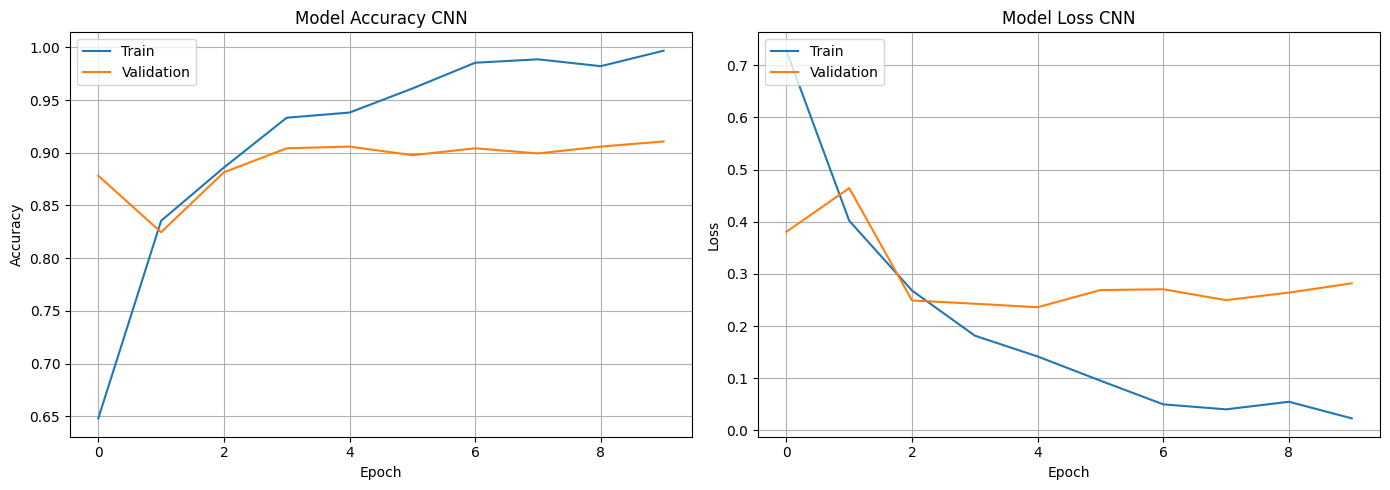

In [5]:
# This code is plottin the training & validation metrics
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy CNN')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.grid(True)


plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss CNN')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.grid(True)

plt.tight_layout()
plt.show()

<div style="padding: 20px; border-color: #c77220; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border: 2px solid crimson;">
    <ul style="font-size: 16px; font-family: 'Arial'; line-height: 1.5em;">
        <li>As we can see, the training set's accuracy is much higher than the test set's accuracy, indicating that our CNN model is <strong>overfitting</strong>. To address this issue, we will apply some <strong>Regularization techniques</strong> to enhance the model's ability to generalize. </li>
    </ul>
   
</div>

<a id="A"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:5px; color:white; margin:0; font-size:90%; font-family:Pacifico; background-color:crimson; overflow:hidden"><b>Building Regularized-CNN-Model 👩🏼‍💻</b></div>

  
<div style="padding: 20px; border-color: #c77220; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border: 2px solid crimson;">
    <ul style="font-size: 16px; font-family: 'Arial'; line-height: 1.5em;">
        <li>The following code defines a <strong>CNN Model with L1 and L2 Regularization</strong> applied to prevent <strong>Overfitting</strong>. </li>
    </ul>
    <ul style="font-size: 16px; font-family: 'Arial'; line-height: 1.5em;">
        <li>
           <strong> L1 Regularization </strong> adds the absolute value of the weights to the loss function, promoting sparsity by driving less important feature weights to zero, effectively performing feature selection.</li>
    </ul>
            <ul style="font-size: 16px; font-family: 'Arial'; line-height: 1.5em;">
        <li>
           <strong> L2 Regularization </strong> adds the squared value of the weights to the loss function, discouraging large weights and promoting generalization by spreading the weights more evenly across all features. </li>
    </ul>
            <ul style="font-size: 16px; font-family: 'Arial'; line-height: 1.5em;">
        <li>
            The <strong>Combined L1_L2 Regularizer</strong> incorporates both benefits, penalizing the absolute as well as the squared magnitudes of the weights, obtaining balance between sparsity and generalization. This technique helps the model to avoid overfitting and improves its performance on unseen data by controlling the complexity of the learned models. </li>
    </ul>
          
</div>

In [6]:
# Here we are defining the model with L1 and L2 regularization
Regularized_model_CNN = tf.keras.models.Sequential([
    layers.Conv2D(16, (3, 3), input_shape=(150, 150, 3), activation='relu',
                  kernel_regularizer=regularizers.l1_l2(l1=0.01, l2=0.01)),
    layers.MaxPooling2D(2, 2),  
    
    layers.Conv2D(32, (3, 3), activation='relu',
                  kernel_regularizer=regularizers.l1_l2(l1=0.01, l2=0.01)),
    layers.MaxPooling2D(2, 2),  
    
    layers.Conv2D(64, (3, 3), activation='relu',
                  kernel_regularizer=regularizers.l1_l2(l1=0.01, l2=0.01)),
    layers.MaxPooling2D(2, 2),
    
   
    layers.Flatten(),
    
    # The layer is fully connected with L2 regularization
    layers.Dense(512, activation='relu',
                 kernel_regularizer=regularizers.l2(0.01)),
    
    layers.Dense(1, activation='sigmoid')
])

Regularized_model_CNN.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

Regularized_model_CNN.summary()

history = Regularized_model_CNN.fit(
      training_dataset,
      steps_per_epoch=100, 
      epochs=10,
      validation_data=test_dataset,
      validation_steps=50) 

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 148, 148, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 74, 74, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 72, 72, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 36, 36, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 34, 34, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 17, 17, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 18496)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     9,470,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,494,561 (36.22 MB)

 Trainable params: 9,494,561 (36.22 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 21s 170ms/step - accuracy: 0.5969 - loss: 14.5848 - val_accuracy: 0.5666 - val_loss: 8.9388
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 18s 160ms/step - accuracy: 0.7152 - loss: 7.3071 - val_accuracy: 0.7451 - val_loss: 5.4300
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 18s 157ms/step - accuracy: 0.7202 - loss: 4.5252 - val_accuracy: 0.7646 - val_loss: 3.3699
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 19s 166ms/step - accuracy: 0.8075 - loss: 2.7599 - val_accuracy: 0.8344 - val_loss: 2.1065
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 18s 156ms/step - accuracy: 0.8379 - loss: 1.8327 - val_accuracy: 0.8636 - val_loss: 1.5066
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 19s 162ms/step - accuracy: 0.8357 - loss: 1.3943 - val_accuracy: 0.8750 - val_loss: 1.2238
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 18s 165ms/step - accuracy: 0.8620 - loss: 1.1670 - val_accuracy: 0.8799 - val_loss: 1.0669
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 19s 163ms/step - accuracy: 0.8698 - loss: 

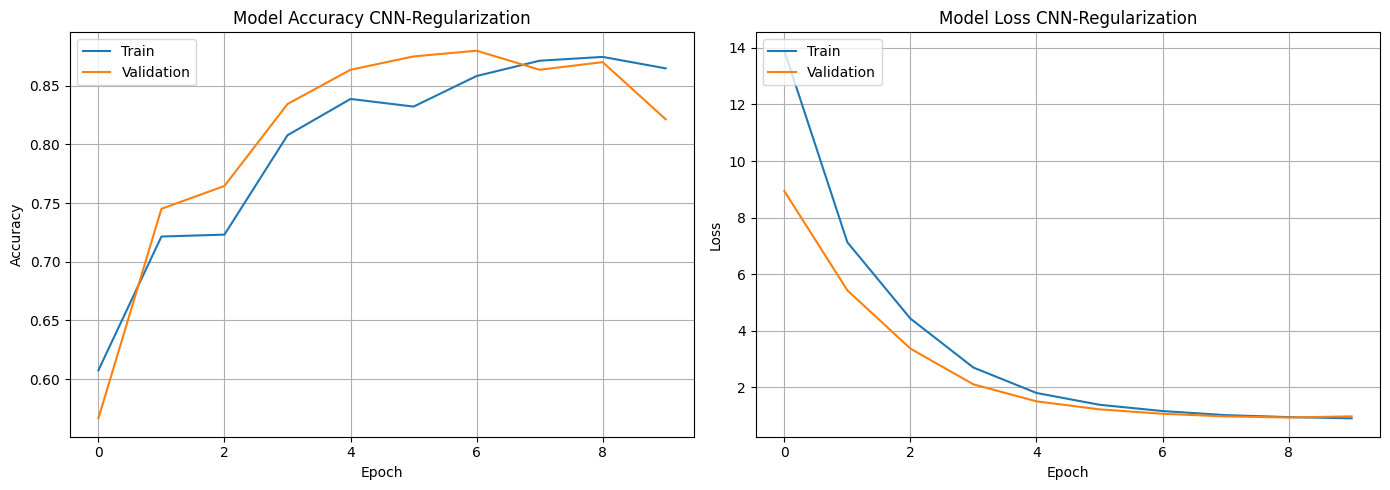

In [7]:
# Here we are plotting training & validation metrics for the Regularized model
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy CNN-Regularization')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.grid(True)

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss CNN-Regularization')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.grid(True)

plt.tight_layout()
plt.show()

<div style="padding: 20px; border-color: #c77220; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border: 2px solid crimson;">
    <ul style="font-size: 16px; font-family: 'Arial'; line-height: 1.5em;">
        <li>The <strong>Regularized-CNN-Model</strong> demonstrates improved generalization on unseen data, as evidenced by the more closely aligned accuracy values of the training and test sets. This indicates that the application of regularization techniques effectively mitigated overfitting, enhancing the model's performance on new data and ensuring its robustness and reliability. </li>
    </ul>
   
</div>

<a id="A"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:5px; color:white; margin:0; font-size:90%; font-family:Pacifico; background-color:crimson; overflow:hidden"><b>🎅🎁 Predictions Visualization 🎄❄️</b></div>

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


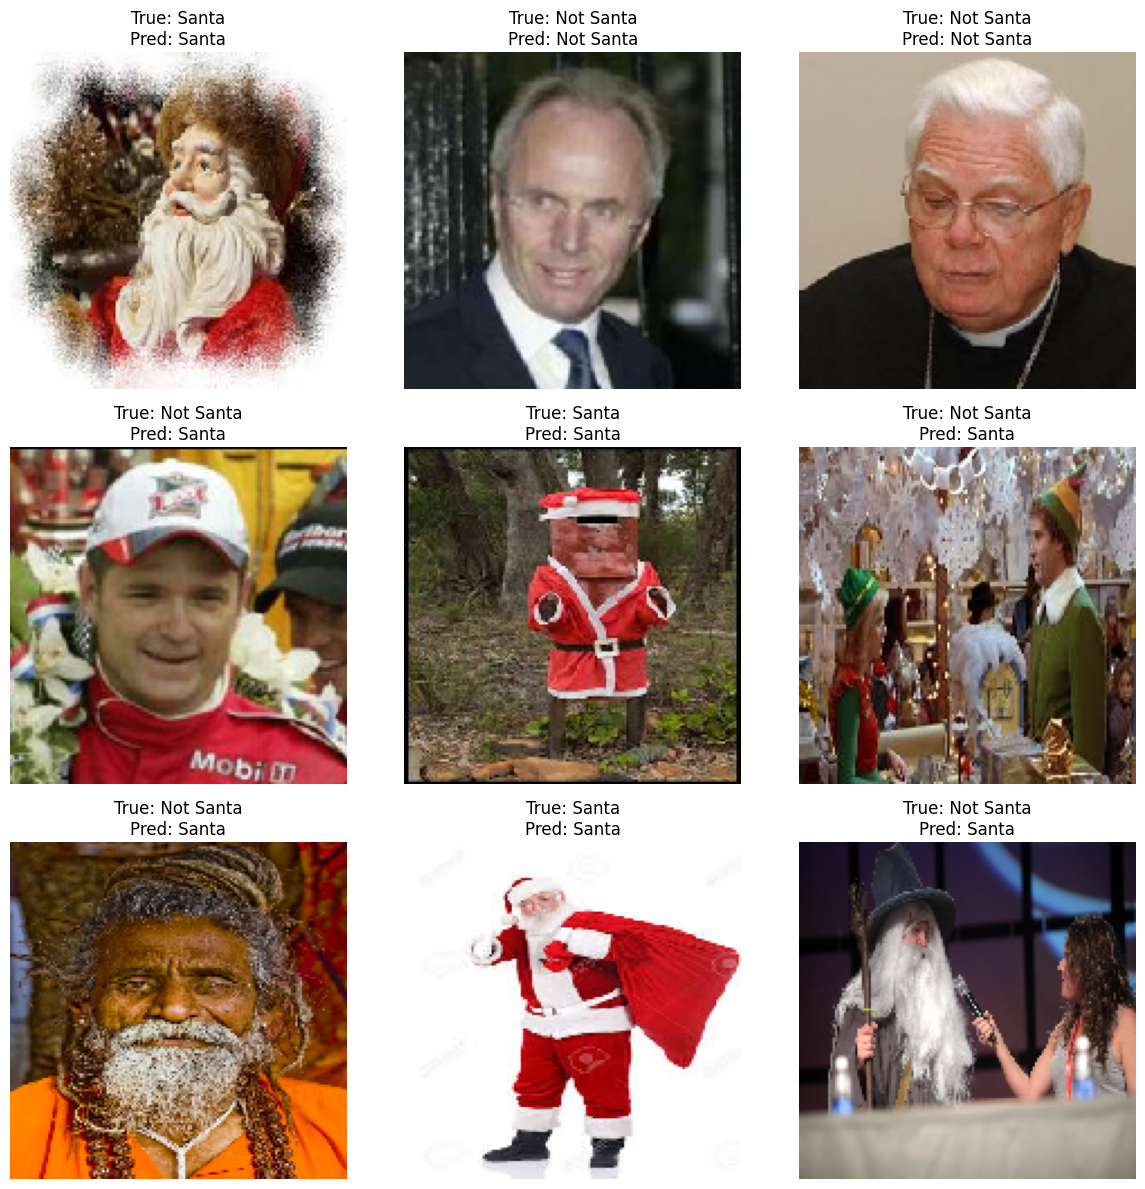

In [8]:
# Here we are getting a batch of images and labels
images, labels = next(test_dataset)

predictions = Regularized_model_CNN.predict(images)
predicted_labels = (predictions > 0.5).astype(int).flatten()  # Converting probabilities to binary labels

# Mapping numerical labels to the classification goals
label_names = {0: "Not Santa", 1: "Santa"}

# Number of images to display (3x3 grid)
num_images = 9

plt.figure(figsize=(12, 12))

for i in range(num_images):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    true_label = label_names[labels[i]]
    predicted_label = label_names[predicted_labels[i]]
    plt.title(f'True: {true_label}\nPred: {predicted_label}')
    plt.axis('off')

plt.tight_layout()
plt.show()

<a id="A"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:10px; color:white; margin:0; font-size:150%; font-family:Pacifico; background-color:crimson; overflow:hidden"><b>🎅 Conclusion 🎁</b></div>



<div style="padding: 20px; border-color: #c77220; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border: 2px solid crimson;">
    <ul style="font-size: 18px; font-family: 'Arial'; line-height: 1.5em;">
        In conclusion, I hope this tutorial has provided you with a clear understanding of how to build a convolutional neural network (CNN) for image classification. You have learned how to recognize overfitting and apply regularization techniques to improve model generalization. Thank you for following along, and I hope you feel confident in your ability to construct and refine CNN models for your own projects.
    </ul>
   
</div>

<div style="text-align: center;">
    <img src="https://alldiamondpainting.com/cdn/shop/products/Bye-Bye_Santa_Claus_74b9e7be-b366-421d-aef0-f129d8715fa5.jpg?v=1680762647" alt="santa" style="width:100%; height:auto; border-radius: 30px;">
</div>



If you found this tutorial helpful, please consider upvoting it. Your positive feedback helps us to continue providing valuable content and assists others in discovering useful resources.

🎄Your support is greatly appreciated🎄

